In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection.validation import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from surprise.prediction_algorithms.matrix_factorization import NMF,SVD

In [2]:
dataset = pd.read_csv('ratings.csv')

### Question 1

In [3]:
sparsity = dataset.shape[0]/(dataset['movieId'].nunique() * dataset['userId'].nunique())

In [4]:
print(sparsity)

0.016439141608663475


### Question 2

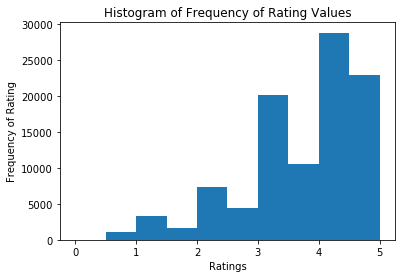

In [5]:
plt.hist(dataset['rating'],bins=np.arange(0, 5 + 0.5, 0.5))
plt.title('Histogram of Frequency of Rating Values')
plt.xlabel('Ratings')
plt.ylabel('Frequency of Rating')
plt.show()

### Question 3

In [6]:
movie_ids = dataset['movieId']
movie_ratings_dict = dict(Counter(movie_ids))

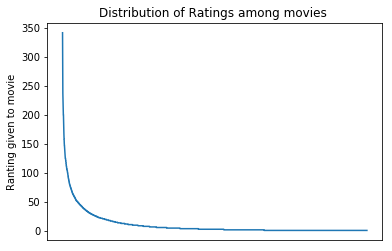

In [7]:
plt.plot(range(0,len(movie_ratings_dict.keys())), sorted(movie_ratings_dict.values(),reverse=True))
plt.title('Distribution of Ratings among movies ')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.ylabel('Ranting given to movie')
plt.show()

### Question 4

In [8]:
user_ids = dataset['userId']
user_ratings_dict = dict(Counter(user_ids))

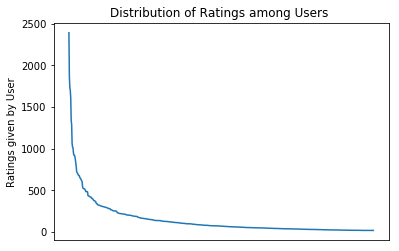

In [10]:
plt.plot(range(0,len(user_ratings_dict.keys())), sorted(user_ratings_dict.values(),reverse=True))
plt.title('Distribution of Ratings among Users ')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.ylabel('Ratings given by User')
plt.show()

### Question 5

In [11]:
sum(sorted(user_ratings_dict.values(),reverse=True)[:100])

55141

### Question 6

In [12]:
id_var = (dataset[['movieId','rating']].groupby('movieId',as_index=False)).var().fillna(0)
id_var_dict = dict(zip(list(id_var['movieId']), id_var['rating']))
var_list = list(dataset[['movieId','rating']].groupby('movieId').var()['rating'])

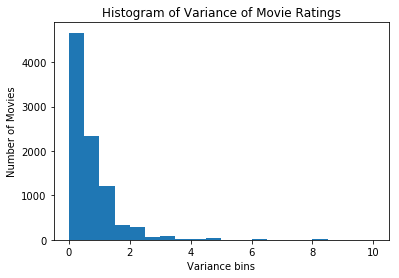

In [13]:
plt.hist(np.nan_to_num(var_list),bins=np.arange(min(var_list), max(var_list), 0.5))
plt.title('Histogram of Variance of Movie Ratings')
plt.ylabel('Number of Movies')
plt.xlabel('Variance bins')
plt.show()


In [15]:
def get_popular(movie_ratings_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>2]
    return [x for x in testset if x[1] in movie_ids]
def get_unpopular(movie_ratings_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]<=2]
    return [x for x in testset if x[1] in movie_ids]

def get_highvar(movie_ratings_dict, var_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>=5]
    movieids = [x for x in movieids if var_dict[x]>=2 ]
    return [x for x in testset if x[1] in movie_ids]
    

## 4.5 k-NN Collaborative Filtering

In [16]:
def do_kFold(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    sim_options = {'name': 'pearson_baseline'}
    kf = KFold(n_splits=splits, random_state=42)
    reader = Reader(rating_scale=(1, 5))
    mae_d={}
    rmse_d={}
    for neigh in range_:
        print('Neighbors ',neigh)
        knn_model = KNNWithMeans( k=neigh, sim_options= sim_options)
        rmse_list=[]
        mae_list =[]
        #print(data_.)
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict,id_var_dict,testset)
            knn_model.fit(trainset)
            predictions = knn_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[neigh]=sum(rmse_list)/len(rmse_list)
        mae_d[neigh]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d



In [17]:
def rmse_mae_plot(rmse_d,mae_d,xl):
    plt.plot(list(rmse_d.keys()),list(rmse_d.values()))
    plt.xlabel(xl)
    plt.ylabel('Average RMSE')
    plt.title(xl+ ' Vs Average RMSE')
    plt.show()
    
    plt.plot(list(mae_d.keys()),list(mae_d.values()))
    plt.xlabel(xl)
    plt.ylabel('Average MAE')
    plt.title(xl+' Vs Average MAE')
    plt.show()

### Question 10

In [18]:
reader = Reader(rating_scale=(1, 5))
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
r_d,m_d = do_kFold(total_data, range(2,101,2),'notrim',movie_ratings_dict)#TODO use 2 instead of 8. 8 is used to compute faster

Neighbors  2
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearso

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.917414511786
Mean mae 0.695714977885
Neighbors  16
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.916163220397
Mean mae 0.695004212339
Neighbors  30
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
D

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.915206844113
Mean mae 0.694049296741
Neighbors  56
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.915737890506
Mean mae 0.694926534529
Neighbors  70
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
C

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.914927423483
Mean mae 0.694262667578
Neighbors  96
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

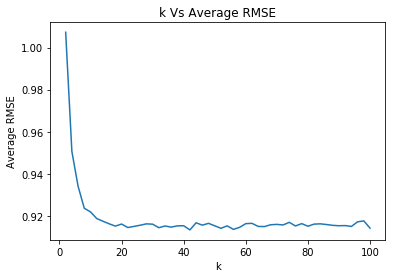

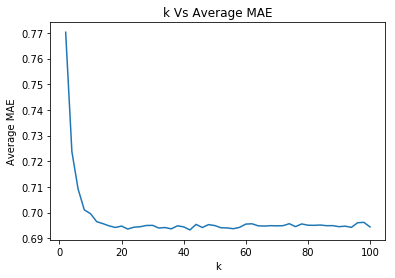

In [47]:
rmse_mae_plot(r_d,m_d,'k')

### Question 11

 k value =20


 RMSE = 0.9146735

### Question 12,13,14

In [20]:
rp_d, mp_d = do_kFold(total_data, range(2,101,2),'p',movie_ratings_dict)#TODO use 2 instead of 8. 8 is used to compute faster
rup_d,mup_d =do_kFold(total_data, range(2,101,2),'up',movie_ratings_dict)#TODO use 2 instead of 8. 8 is used to compute faster
rhv_d,mhv_d =do_kFold(total_data, range(2,101,2),'hv',movie_ratings_dict,id_var_dict= id_var_dict)#TODO use 2 instead of 8. 8 is used to compute faster

Neighbors  2
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearso

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.91653113219
Mean mae 0.694615320537
Neighbors  16
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Es

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.909762521246
Mean mae 0.690050890829
Neighbors  30
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
D

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.912876383931
Mean mae 0.692897457148
Neighbors  56
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.912721767265
Mean mae 0.692241260087
Neighbors  70
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
C

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.91103123977
Mean mae 0.691971271194
Neighbors  96
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Es

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.922791198939
Mean mae 0.700031260856
Neighbors  10
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
D

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.912740854253
Mean mae 0.691751552389
Neighbors  36
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.913933079403
Mean mae 0.693037624516
Neighbors  50
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
C

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.911461348084
Mean mae 0.691728353475
Neighbors  76
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.913019049935
Mean mae 0.692506039302
Neighbors  90
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
D

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.914597087677
Mean mae 0.693308589553
Neighbors  16
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.912250301779
Mean mae 0.691919980809
Neighbors  30
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
C

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.912390992915
Mean mae 0.692274999072
Neighbors  56
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.913692286703
Mean mae 0.693447071749
Neighbors  70
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
C

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.912440326129
Mean mae 0.692529042064
Neighbors  96
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

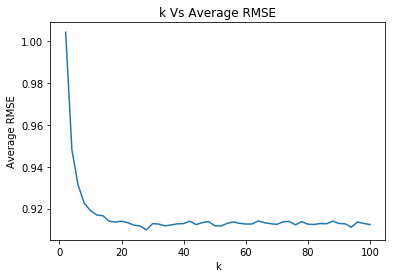

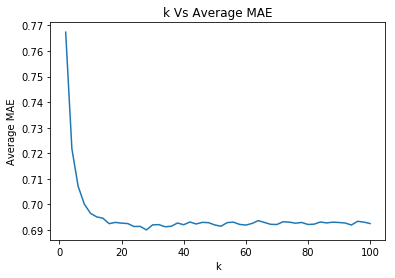

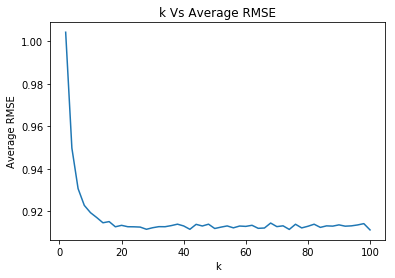

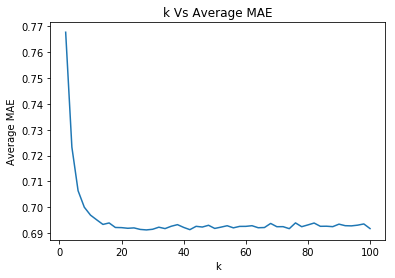

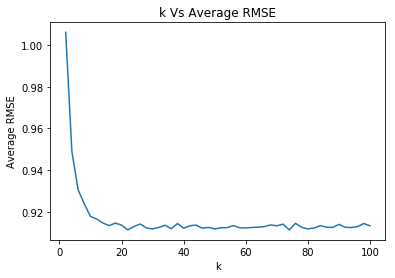

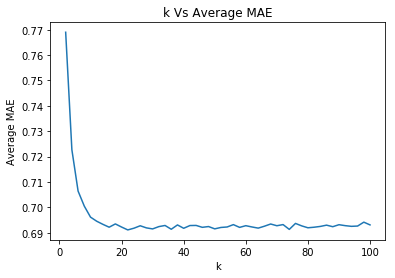

In [48]:
rmse_mae_plot(rp_d,mp_d,'k')
rmse_mae_plot(rup_d,mup_d,'k')
rmse_mae_plot(rhv_d,mhv_d,'k')

## NNNMF

In [18]:
def NMF_filter(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    kf = KFold(n_splits=splits, random_state=42)
    reader = Reader(rating_scale=(1, 5))
    mae_d={}
    rmse_d={}
    for latent_factors in range_:
        print('Number of Latent Factors : ',latent_factors)
        nmf_model = NMF(n_factors = latent_factors,random_state=42)
        rmse_list=[]
        mae_list =[]
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict,id_var_dict,testset)
            nmf_model.fit(trainset)
            predictions = nmf_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[latent_factors]=sum(rmse_list)/len(rmse_list)
        mae_d[latent_factors]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d

### Question 17

In [19]:
reader = Reader(rating_scale=(1, 5))
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
nmf_rmse , nmf_mae = NMF_filter(total_data, range(2,51,2),'notrim',movie_ratings_dict) #replace 8 with 2

Number of Latent Factors :  2
Mean rmse 1.18094024788
Mean mae 1.00016237646
Number of Latent Factors :  4
Mean rmse 1.07119866551
Mean mae 0.881807715314
Number of Latent Factors :  6
Mean rmse 1.01336843616
Mean mae 0.815836935324
Number of Latent Factors :  8
Mean rmse 0.975471384524
Mean mae 0.773456302723
Number of Latent Factors :  10
Mean rmse 0.954326362623
Mean mae 0.747147922223
Number of Latent Factors :  12
Mean rmse 0.949709121682
Mean mae 0.737179115313
Number of Latent Factors :  14
Mean rmse 0.941162679347
Mean mae 0.725622345059
Number of Latent Factors :  16
Mean rmse 0.93608637007
Mean mae 0.71822273472
Number of Latent Factors :  18
Mean rmse 0.939006908011
Mean mae 0.717003485739
Number of Latent Factors :  20
Mean rmse 0.940254413017
Mean mae 0.714483552283
Number of Latent Factors :  22
Mean rmse 0.939655076803
Mean mae 0.712608365471
Number of Latent Factors :  24
Mean rmse 0.944028792474
Mean mae 0.715333643051
Number of Latent Factors :  26
Mean rmse 0.9456351

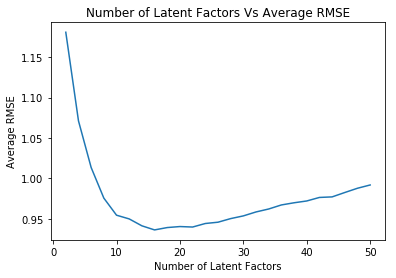

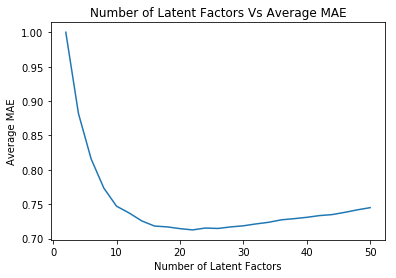

In [20]:
rmse_mae_plot(nmf_rmse,nmf_mae,'Number of Latent Factors')

### Question 18

In [21]:
print("Minimum Average RMSE : ",min(nmf_rmse.values()))
print("Minimum Average MAE : ",min(nmf_mae.values()))
best_n_factors = [k for k,v in nmf_rmse.items() if v == min(nmf_rmse.values())]
best_n_factors_nmf = best_n_factors[0]
print("Best number of latent factors : ",best_n_factors_nmf)

Minimum Average RMSE :  0.93608637007
Minimum Average MAE :  0.712608365471
Best number of latent factors :  16


### Question 19 20 21

In [79]:
print("-----Popular Movies Testset-----")
nmf_rmse_p , nmf_mae_p = NMF_filter(total_data, range(2,51,2),'p',movie_ratings_dict) #replace 8 with 2
print("-----Unpopular Movies Testset-----")
nmf_rmse_up , nmf_mae_up = NMF_filter(total_data, range(2,51,2),'up',movie_ratings_dict) #replace 8 with 2

-----Popular Movies Testset-----
Number of Latent Factors :  2
Mean rmse 1.18001634361
Mean mae 0.99958249622
Number of Latent Factors :  4
Mean rmse 1.06966283017
Mean mae 0.8806501983
Number of Latent Factors :  6
Mean rmse 1.01078933694
Mean mae 0.813780695263
Number of Latent Factors :  8
Mean rmse 0.972066985966
Mean mae 0.770740464927
Number of Latent Factors :  10
Mean rmse 0.951055529964
Mean mae 0.744705621391
Number of Latent Factors :  12
Mean rmse 0.947201904702
Mean mae 0.735086018422
Number of Latent Factors :  14
Mean rmse 0.937883057667
Mean mae 0.722955398682
Number of Latent Factors :  16
Mean rmse 0.932726034815
Mean mae 0.715475425438
Number of Latent Factors :  18
Mean rmse 0.935772182751
Mean mae 0.714304242715
Number of Latent Factors :  20
Mean rmse 0.937412565544
Mean mae 0.712141290925
Number of Latent Factors :  22
Mean rmse 0.936816510655
Mean mae 0.710290457398
Number of Latent Factors :  24
Mean rmse 0.941150307345
Mean mae 0.712896366666
Number of Latent 

In [80]:
print("-----High Variance Movies Testset-----")
nmf_rmse_hv , nmf_mae_hv = NMF_filter(total_data, range(2,51,2),'hv',movie_ratings_dict,id_var_dict= id_var_dict) #replace 8 with 2

-----High Variance Movies Testset-----
Number of Latent Factors :  2
Mean rmse 1.18001634361
Mean mae 0.99958249622
Number of Latent Factors :  4
Mean rmse 1.06966283017
Mean mae 0.8806501983
Number of Latent Factors :  6
Mean rmse 1.01078933694
Mean mae 0.813780695263
Number of Latent Factors :  8
Mean rmse 0.972066985966
Mean mae 0.770740464927
Number of Latent Factors :  10
Mean rmse 0.951055529964
Mean mae 0.744705621391
Number of Latent Factors :  12
Mean rmse 0.947201904702
Mean mae 0.735086018422
Number of Latent Factors :  14
Mean rmse 0.937883057667
Mean mae 0.722955398682
Number of Latent Factors :  16
Mean rmse 0.932726034815
Mean mae 0.715475425438
Number of Latent Factors :  18
Mean rmse 0.935772182751
Mean mae 0.714304242715
Number of Latent Factors :  20
Mean rmse 0.937412565544
Mean mae 0.712141290925
Number of Latent Factors :  22
Mean rmse 0.936816510655
Mean mae 0.710290457398
Number of Latent Factors :  24
Mean rmse 0.941150307345
Mean mae 0.712896366666
Number of L

-----Popular Movies Testset-----


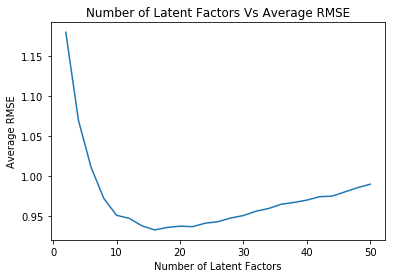

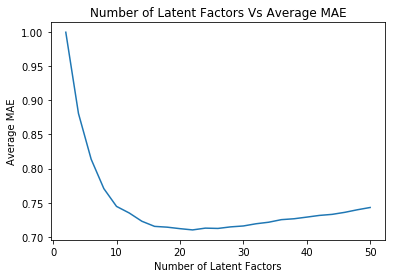

Minimum Average RMSE :  0.932726034815
Minimum Average MAE :  0.710290457398
-----Unpopular Movies Testset-----


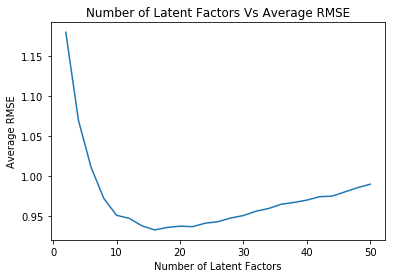

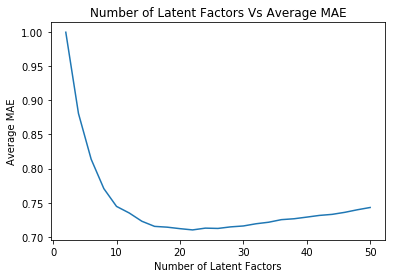

Minimum Average RMSE :  0.932726034815
Minimum Average MAE :  0.710290457398
-----High Variance Movies Testset-----


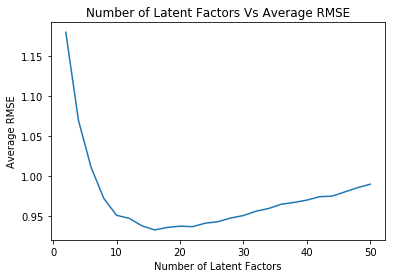

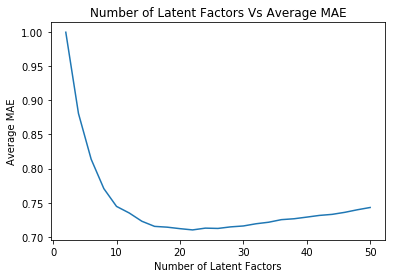

Minimum Average RMSE :  0.932726034815
Minimum Average MAE :  0.710290457398


In [82]:
print("-----Popular Movies Testset-----")
rmse_mae_plot(nmf_rmse_p,nmf_mae_p,'Number of Latent Factors')
print("Minimum Average RMSE : ",min(nmf_rmse_p.values()))
print("Minimum Average MAE : ",min(nmf_mae_p.values()))
print("-----Unpopular Movies Testset-----")
rmse_mae_plot(nmf_rmse_up,nmf_mae_up,'Number of Latent Factors')
print("Minimum Average RMSE : ",min(nmf_rmse_up.values()))
print("Minimum Average MAE : ",min(nmf_mae_up.values()))
print("-----High Variance Movies Testset-----")
rmse_mae_plot(nmf_rmse_hv,nmf_mae_hv,'Number of Latent Factors')
print("Minimum Average RMSE : ",min(nmf_rmse_hv.values()))
print("Minimum Average MAE : ",min(nmf_mae_hv.values()))

### Question 22

In [22]:
def plot_roc(fpr, tpr, roc_auc, threshold_value):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for threshold value : ' + str(threshold_value))
    plt.legend(loc="lower right")
    plt.show()

In [23]:
def plot_roc_curves(testset,preds,thresholds_arr):
    for threshold_value in thresholds_arr:
        y_test = []
        y_preds = []
        for x in testset:
            if x[2] < threshold_value:
                y_test.append(0)
            else:
                y_test.append(1)
        for i in range(len(preds)):
            y_preds.append(preds[i][3])
        fpr, tpr, thresholds = roc_curve(y_test, y_preds)
        roc_auc = auc(fpr, tpr)
        plot_roc(fpr,tpr, roc_auc,threshold_value)

In [24]:
reader = Reader(rating_scale=(1, 5))
data_roc = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
train_set, test_set = train_test_split(data_roc, test_size = 0.1, random_state = 0)
roc_nmf_model = NMF(n_factors = best_n_factors_nmf,random_state=42)
roc_nmf_model.fit(train_set)
preds = roc_nmf_model.test(test_set)

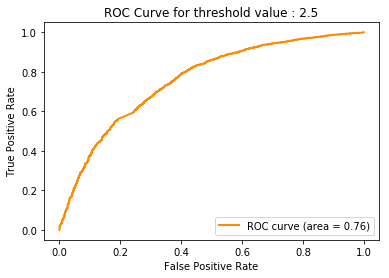

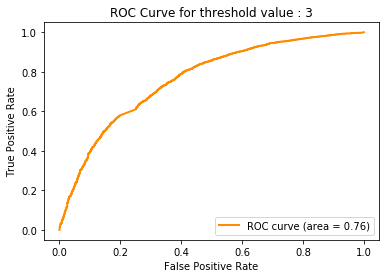

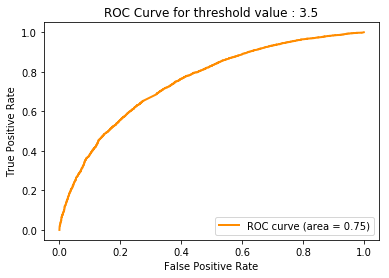

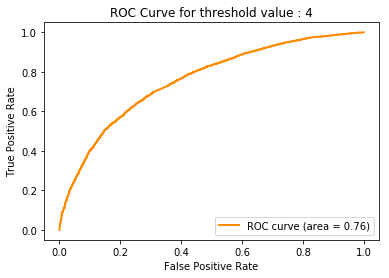

In [25]:
thresholds = [2.5,3,3.5,4]
plot_roc_curves(test_set,preds,thresholds)

### Question 23

In [26]:
algo = NMF(n_factors = 20, random_state=42)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
trainset = data.build_full_trainset()
algo.fit(trainset)
v = algo.qi
top_ids = [[] for _ in range(20)]
for i in range(0,v.shape[1]):
    top_ids[i].append(np.argsort(v[:,i]))

In [27]:
arr = dataset['movieId'].values
indexes = np.unique(arr,return_index = True)[1]
movie_list = [arr[i] for i in sorted(indexes)]


In [28]:
movies_data = pd.read_csv('movies.csv')
movie_genre = movies_data[['movieId','genres']]

In [29]:
for col_num in range(0,5):
    print("Genres for column ",col_num," : ")
    top10 = []
    genres = []
    movies_true_ids = []
    a = top_ids[col_num]
    for i in range(0,10):
        top10.append(a[0][i])
        movies_true_ids.append(movie_list[top10[i]])
        genres.append(list(movie_genre.iloc[movie_genre.index[movie_genre['movieId'] == movies_true_ids[i]]]['genres'].values))
    print(genres)

Genres for column  0  : 
[['Adventure|Children|Drama'], ['Comedy|Thriller'], ['Action|Adventure|Comedy|Fantasy'], ['Drama|Mystery|Romance'], ['Drama|Fantasy|Sci-Fi'], ['Crime|Thriller'], ['Children|Comedy'], ['Documentary'], ['Action|Crime'], ['Horror|Thriller']]
Genres for column  1  : 
[['Action'], ['Adventure|Drama|Fantasy|Romance'], ['Action|Adventure|Children|Fantasy'], ['Children|Comedy'], ['Comedy'], ['Drama|Musical|Romance'], ['Comedy|Fantasy|Musical|Romance'], ['Action|Sci-Fi'], ['Action|Drama'], ['Action|Drama|Thriller']]
Genres for column  2  : 
[['Action|Adventure|Children|Comedy|Mystery'], ['Comedy|Musical|Romance'], ['Adventure|Children|Fantasy'], ['Comedy'], ['Comedy'], ['Adventure|Children|Drama'], ['Comedy'], ['Horror|Sci-Fi'], ['Comedy'], ['Horror']]
Genres for column  3  : 
[['Horror|Sci-Fi'], ['Action|Drama|Thriller'], ['Comedy|Musical'], ['Animation|Comedy|Fantasy'], ['Drama|Musical'], ['Action|Adventure|Children|Fantasy'], ['Adventure|Drama|Fantasy|Romance'], ['Co

## Matrix Factorization with bias

In [30]:
def SVD_filter(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    kf = KFold(n_splits=splits,random_state=42)
    reader = Reader(rating_scale=(1, 5))
    mae_d={}
    rmse_d={}
    for latent_factors in range_:
        print('Number of Latent Factors : ',latent_factors)
        svd_model = SVD(n_factors = latent_factors,random_state=42)
        rmse_list=[]
        mae_list =[]
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict, id_var_dict, testset)
            svd_model.fit(trainset)
            predictions = svd_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[latent_factors]=sum(rmse_list)/len(rmse_list)
        mae_d[latent_factors]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d

### Question 24

In [31]:
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
svd_rmse , svd_mae = SVD_filter(total_data, range(2,51,2),'notrim',movie_ratings_dict)

Number of Latent Factors :  2
Mean rmse 0.887508168262
Mean mae 0.683446250984
Number of Latent Factors :  4
Mean rmse 0.887152229959
Mean mae 0.68302185297
Number of Latent Factors :  6
Mean rmse 0.888712642637
Mean mae 0.684267481054
Number of Latent Factors :  8
Mean rmse 0.887787713442
Mean mae 0.683170031046
Number of Latent Factors :  10
Mean rmse 0.888036534284
Mean mae 0.683576897015
Number of Latent Factors :  12
Mean rmse 0.889065307234
Mean mae 0.684367197032
Number of Latent Factors :  14
Mean rmse 0.888409975659
Mean mae 0.683838296159
Number of Latent Factors :  16
Mean rmse 0.888693936884
Mean mae 0.683787315381
Number of Latent Factors :  18
Mean rmse 0.887850065936
Mean mae 0.682898854084
Number of Latent Factors :  20
Mean rmse 0.888159512883
Mean mae 0.68345105743
Number of Latent Factors :  22
Mean rmse 0.887652709753
Mean mae 0.682980681032
Number of Latent Factors :  24
Mean rmse 0.887386463024
Mean mae 0.682496042345
Number of Latent Factors :  26
Mean rmse 0.887

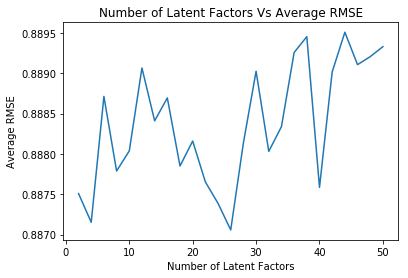

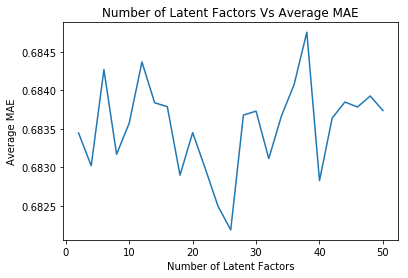

In [33]:
rmse_mae_plot(svd_rmse,svd_mae,'Number of Latent Factors')

### Question 25

In [34]:
print("Minimum Average RMSE : ",min(svd_rmse.values()))
print("Minimum Average MAE : ",min(svd_mae.values()))
best_n_factors = [k for k,v in svd_rmse.items() if v == min(svd_rmse.values())]
best_n_factors_svd = best_n_factors[0]
print("Best number of latent factors : ",best_n_factors_svd)

Minimum Average RMSE :  0.887057454887
Minimum Average MAE :  0.682189140687
Best number of latent factors :  26


### Question 26,27,28

In [35]:
print("-----Popular Movies Testset-----")
svd_rmse_p , svd_mae_p = SVD_filter(total_data, range(2,51,2),'p',movie_ratings_dict)

-----Popular Movies Testset-----
Number of Latent Factors :  2
Mean rmse 0.8869138535
Mean mae 0.682618076308
Number of Latent Factors :  4
Mean rmse 0.8865150262
Mean mae 0.682211360806
Number of Latent Factors :  6
Mean rmse 0.888127344416
Mean mae 0.683446987063
Number of Latent Factors :  8
Mean rmse 0.887153174109
Mean mae 0.682322116608
Number of Latent Factors :  10
Mean rmse 0.887354890839
Mean mae 0.68269844121
Number of Latent Factors :  12
Mean rmse 0.888402645817
Mean mae 0.68350265676
Number of Latent Factors :  14
Mean rmse 0.887739578007
Mean mae 0.682963708825
Number of Latent Factors :  16
Mean rmse 0.887958637738
Mean mae 0.682860643933
Number of Latent Factors :  18
Mean rmse 0.887255600466
Mean mae 0.682104766446
Number of Latent Factors :  20
Mean rmse 0.887625841141
Mean mae 0.682702213135
Number of Latent Factors :  22
Mean rmse 0.886992334113
Mean mae 0.682078252518
Number of Latent Factors :  24
Mean rmse 0.886741354337
Mean mae 0.681643642425
Number of Latent 

In [36]:
print("-----Unpopular Movies Testset-----")
svd_rmse_up , svd_mae_up = SVD_filter(total_data, range(2,51,2),'up',movie_ratings_dict) 

-----Unpopular Movies Testset-----
Number of Latent Factors :  2
Mean rmse 0.8869138535
Mean mae 0.682618076308
Number of Latent Factors :  4
Mean rmse 0.8865150262
Mean mae 0.682211360806
Number of Latent Factors :  6
Mean rmse 0.888127344416
Mean mae 0.683446987063
Number of Latent Factors :  8
Mean rmse 0.887153174109
Mean mae 0.682322116608
Number of Latent Factors :  10
Mean rmse 0.887354890839
Mean mae 0.68269844121
Number of Latent Factors :  12
Mean rmse 0.888402645817
Mean mae 0.68350265676
Number of Latent Factors :  14
Mean rmse 0.887739578007
Mean mae 0.682963708825
Number of Latent Factors :  16
Mean rmse 0.887958637738
Mean mae 0.682860643933
Number of Latent Factors :  18
Mean rmse 0.887255600466
Mean mae 0.682104766446
Number of Latent Factors :  20
Mean rmse 0.887625841141
Mean mae 0.682702213135
Number of Latent Factors :  22
Mean rmse 0.886992334113
Mean mae 0.682078252518
Number of Latent Factors :  24
Mean rmse 0.886741354337
Mean mae 0.681643642425
Number of Laten

In [37]:
print("-----High Variance Movies Testset-----")
svd_rmse_hv , svd_mae_hv = SVD_filter(total_data, range(2,51,2),'hv',movie_ratings_dict, id_var_dict=id_var_dict)

-----High Variance Movies Testset-----
Number of Latent Factors :  2
Mean rmse 0.8869138535
Mean mae 0.682618076308
Number of Latent Factors :  4
Mean rmse 0.8865150262
Mean mae 0.682211360806
Number of Latent Factors :  6
Mean rmse 0.888127344416
Mean mae 0.683446987063
Number of Latent Factors :  8
Mean rmse 0.887153174109
Mean mae 0.682322116608
Number of Latent Factors :  10
Mean rmse 0.887354890839
Mean mae 0.68269844121
Number of Latent Factors :  12
Mean rmse 0.888402645817
Mean mae 0.68350265676
Number of Latent Factors :  14
Mean rmse 0.887739578007
Mean mae 0.682963708825
Number of Latent Factors :  16
Mean rmse 0.887958637738
Mean mae 0.682860643933
Number of Latent Factors :  18
Mean rmse 0.887255600466
Mean mae 0.682104766446
Number of Latent Factors :  20
Mean rmse 0.887625841141
Mean mae 0.682702213135
Number of Latent Factors :  22
Mean rmse 0.886992334113
Mean mae 0.682078252518
Number of Latent Factors :  24
Mean rmse 0.886741354337
Mean mae 0.681643642425
Number of L

-----Popular Movies Testset-----


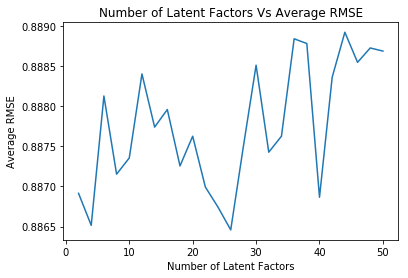

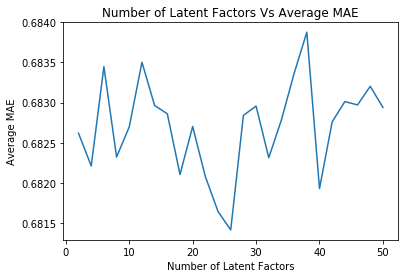

Minimum Average RMSE :  0.886458040982
Minimum Average MAE :  0.681414852661
-----Unpopular Movies Testset-----


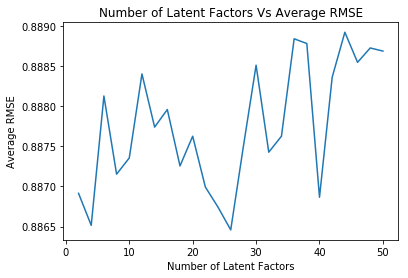

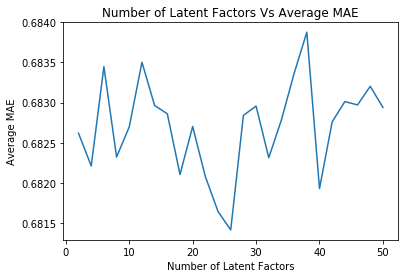

Minimum Average RMSE :  0.886458040982
Minimum Average MAE :  0.681414852661
-----High Variance Movies Testset-----


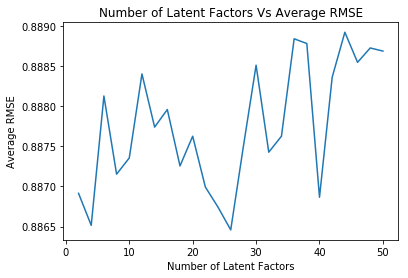

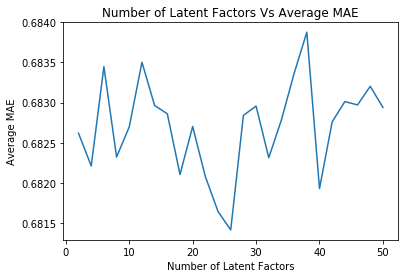

Minimum Average RMSE :  0.886458040982
Minimum Average MAE :  0.681414852661


In [39]:
print("-----Popular Movies Testset-----")
rmse_mae_plot(svd_rmse_p,svd_mae_p,'Number of Latent Factors')
print("Minimum Average RMSE : ",min(svd_rmse_p.values()))
print("Minimum Average MAE : ",min(svd_mae_p.values()))
print("-----Unpopular Movies Testset-----")
rmse_mae_plot(svd_rmse_up,svd_mae_up,'Number of Latent Factors')
print("Minimum Average RMSE : ",min(svd_rmse_up.values()))
print("Minimum Average MAE : ",min(svd_mae_up.values()))
print("-----High Variance Movies Testset-----")
rmse_mae_plot(svd_rmse_hv,svd_mae_hv,'Number of Latent Factors')
print("Minimum Average RMSE : ",min(svd_rmse_hv.values()))
print("Minimum Average MAE : ",min(svd_mae_hv.values()))

### Question 29

In [ ]:
data_roc = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
train_set, test_set = train_test_split(data_roc, test_size = 0.1, random_state = 42)
roc_svd_model = SVD(n_factors = best_n_factors_svd,random_state=42)
roc_svd_model.fit(train_set)
preds = roc_svd_model.test(test_set)
thresholds = [2.5,3,3.5,4]
plot_roc_curves(test_set,preds,thresholds)

## Naive Collaborative filtering

In [40]:
from sklearn.model_selection import KFold

In [41]:
# Function that returns mean rating of the user
def mean_rating(user):
    user_dataset = dataset.loc[dataset['userId'] == user]
    l = len(user_dataset)
    rating_sum = np.sum(user_dataset['rating'])
    return rating_sum/l

In [42]:
mean_rating(1)

2.55

In [43]:
def get_popular_dataset(testset):
    popular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>2]
    popular_movie_dataset = dataset.loc[dataset['movieId'].isin(popular_movieids)]
    return popular_movie_dataset

def get_unpopular_dataset(testset):
    unpopular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]<=2]
    unpopular_movie_dataset = dataset.loc[dataset['movieId'].isin(unpopular_movieids)]
    return unpopular_movie_dataset

def get_highvar_dataset(testset):
    high_variance_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>=5]
    high_variance_movieids = [x for x in high_variance_movieids if id_var_dict[x]>=2 ]
    highvar_movie_dataset = dataset.loc[dataset['movieId'].isin(high_variance_movieids)]
    return highvar_movie_dataset

In [44]:
def rmse(preds, true_vals):
    change = preds-true_vals
    rms = np.sqrt(np.sum(c*c for c in change))
    return rms/len(preds)

In [45]:
def naive_cf(df, subset):
    error = []
    for i in range(10):
        kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
        result = next(kf.split(df), None)
        train = df.iloc[result[0]]
        test =  df.iloc[result[1]]
        if subset == 'entire':
            test2 = test
        if subset == 'popular':
            test2 = get_popular_dataset(test)
        if subset == 'unpopular':
            test2 = get_unpopular_dataset(test)
        if subset == 'highvar':
            test2 = get_highvar_dataset(test)
        predictions = [mean_rating(i) for i in test2['userId']]
        error.append(rmse(predictions, test2['rating']))
    print("RMSE 10-fold cross validation: ", np.sum(error)/10)

### Question 30

In [46]:
# Question 30
print("Entire dataset")
naive_cf(dataset, "entire")

Entire dataset
RMSE 10-fold cross validation:  0.00953415984386


### Question 31 - 33

In [48]:
# Question 31
print("Popular movie dataset")
naive_cf(dataset, "popular")

Popular movie dataset
RMSE 10-fold cross validation:  0.00309672353362


In [49]:
# Question 32
print("Unpopular movie dataset")
naive_cf(dataset, "unpopular")

Unpopular movie dataset
RMSE 10-fold cross validation:  0.0136684295982


In [50]:
# Question 33
print("High variance movie dataset")
naive_cf(dataset, "highvar")

High variance movie dataset
RMSE 10-fold cross validation:  0.0485738386232


### Question 34

In [52]:
# Question 34 
def roc_plot_requirements(testset, preds, threshold_value):
    y_test = []
    y_preds = []
    
    for x in testset:
        if x[2] < threshold_value:
            y_test.append(0)
        else:
            y_test.append(1)
    for i in range(len(preds)):
        y_preds.append(preds[i][3])
        
    fpr, tpr, thresholds = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

def plot_roc_combined(algos, threshold_value):
    data_roc = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
    trainset, testset = train_test_split(data_roc, test_size = 0.1, random_state = 0)
    plt.figure()
    lw = 2
    for algo in algos:
        if algo == 'knn':
            sim_options = {'name': 'pearson_baseline'}
            algo = KNNWithMeans(k=20, sim_options=sim_options)   # k = 20 (from Q11)
            algo.fit(trainset)
            predictions = algo.test(testset)
            fpr, tpr, roc_auc = roc_plot_requirements(testset, predictions, threshold_value)
            plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
        if algo == 'nnmf':
            algo = NMF(n_factors = best_n_factors_nmf)     # Best number . of latent factors = 16
            algo.fit(trainset)
            predictions = algo.test(testset)
            fpr, tpr, roc_auc = roc_plot_requirements(testset, predictions, threshold_value)
            plt.plot(fpr, tpr, color='blue',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
        if algo == 'mf':
            algo = SVD(n_factors = best_n_factors_svd)   # Best number of latent factors = 2
            algo.fit(trainset)
            predictions = algo.test(testset)
            fpr, tpr, roc_auc = roc_plot_requirements(testset, predictions, threshold_value)
            plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
            
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for threshold value : ' + str(threshold_value))
    plt.legend(loc="lower right")
    plt.show()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


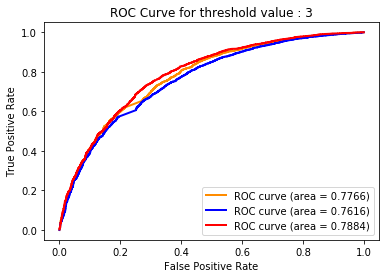

In [53]:
algos = ['knn', 'nnmf', 'mf']
plot_roc_combined(algos, 3)

In [54]:
user_ids = dataset['userId'].unique()

In [55]:
user_movie_rating = dataset[['userId', 'movieId', 'rating']].fillna(0)

In [56]:
dataset.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [57]:
user_movie_rating_new = user_movie_rating[user_movie_rating.rating > 3]   # threshold for ground truth values = 3

In [58]:
user_movie_rating_new['movieId'].nunique()

6993

In [59]:
user_movies_dict = {}  # ground truth values for users
for uid in user_ids:
    df = user_movie_rating_new[user_movie_rating_new.userId == uid]
    if uid in user_movies_dict:
        user_movies_dict[uid].append(df.movieId)
    else:
        user_movies_dict[uid] = df.movieId

In [60]:
user_movies_dict = {k: v for k, v in user_movies_dict.items() if len(v) != 0}  # removes users with 0 ratings

In [61]:
def getPrecision(recommendations, uid, user_movies_dict=user_movies_dict):
    rec_common = [x for x in recommendations if x in user_movies_dict[uid]]
    precision = float(len(rec_common)/len(recommendations))
    return precision

def getRecall(recommendations, uid, user_movies_dict=user_movies_dict):
    rec_common = [x for x in recommendations if x in user_movies_dict[uid]]
    recall = float(len(rec_common)/len(user_movies_dict[uid]))
    return recall

In [62]:
from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

def getS_KNN(trainset, testset, t):
    sim_options = {'name': 'pearson_baseline'}
    algo = KNNWithMeans(k=20, sim_options=sim_options)   # k = 20 (from Q11)
    algo.fit(trainset)
    # Than predict ratings for all pairs (u, i) that are NOT in the training set.
    predictions = algo.test(testset)
    top_n = get_top_n(predictions, n=t)
    
    S = {}
    # Recommended items for each user
    for uid, user_ratings in top_n.items():
        S[uid] = [iid for (iid, _) in user_ratings]
    return S

def getS_NNMF(trainset, testset, t):
    algo = NMF(n_factors = 16,random_state=42)     # Best number . of latent factors = 16
    algo.fit(trainset)
    # Than predict ratings for all pairs (u, i) that are NOT in the training set.
    predictions = algo.test(testset)
    top_n = get_top_n(predictions, n=t)
    
    S = {}
    # Recommended items for each user
    for uid, user_ratings in top_n.items():
        S[uid] = [iid for (iid, _) in user_ratings]
    return S

def getS_MF(trainset, testset, t):
    algo = SVD(n_factors = 2,random_state=42)   # Best number of latent factors = 2
    algo.fit(trainset)
    # Than predict ratings for all pairs (u, i) that are NOT in the training set.
    predictions = algo.test(testset)
    top_n = get_top_n(predictions, n=t)
    
    S = {}
    # Recommended items for each user
    for uid, user_ratings in top_n.items():
        S[uid] = [iid for (iid, _) in user_ratings]
    return S

In [63]:
from surprise.model_selection import KFold

def precision_recall(tvals, algo):
    avg_precision_t = []
    avg_recall_t = []
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(user_movie_rating_new[['userId','movieId','rating']], reader)
    kf = KFold(n_splits=10,random_state=42)
    for t in tvals:
        precisions = []
        recalls = []
        for trainset, testset in kf.split(data):
            user_precisions = []
            user_recalls = []
            if algo == 'knn':
                S = getS_KNN(trainset, testset, t)
            if algo == 'nnmf':
                S = getS_NNMF(trainset, testset, t)
            if algo == 'mf':
                S = getS_MF(trainset, testset, t)
            
            uids = [x[0] for x in testset]
            for uid in uids:
                user_precisions.append(getPrecision(S[uid], uid))
                user_recalls.append(getRecall(S[uid], uid))
            
            fold_precision = sum(user_precisions)/len(user_precisions)
            fold_recall = sum(user_recalls)/len(user_recalls)
            precisions.append(fold_precision)
            recalls.append(fold_recall)
        precision_t = sum(precisions)/len(precisions)
        recall_t = sum(recalls)/len(recalls)
        avg_precision_t.append(precision_t)
        avg_recall_t.append(recall_t)
    return avg_precision_t, avg_recall_t

In [64]:
def plot_func(x, y, xlabel, ylabel, title):
    plt.figure()
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [65]:
tvals = range(1,25,1)

### Question 36 

In [66]:
precision_knn, recall_knn = precision_recall(tvals, "knn")

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

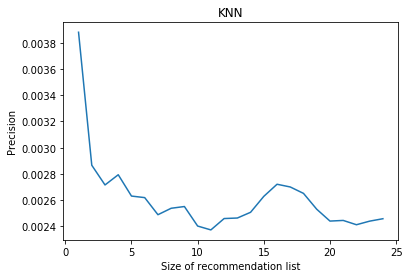

In [67]:
plot_func(tvals, precision_knn, "Size of recommendation list", "Precision", "KNN")

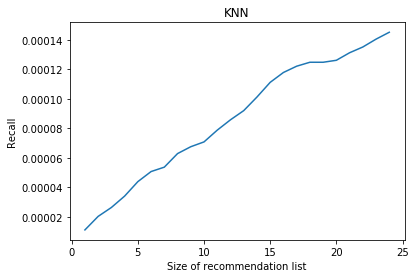

In [68]:
plot_func(tvals, recall_knn, "Size of recommendation list", "Recall", "KNN")

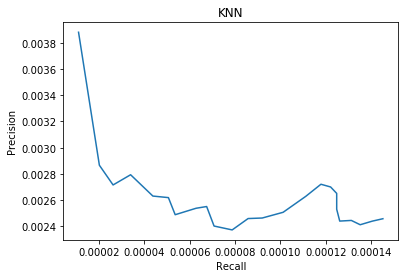

In [69]:
plot_func(recall_knn, precision_knn, "Recall", "Precision", "KNN")

### Question 37 

In [70]:
precision_nnmf, recall_nnmf = precision_recall(tvals, "nnmf")

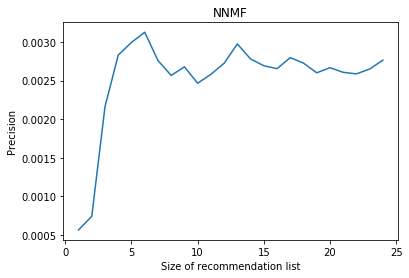

In [71]:
plot_func(tvals, precision_nnmf, "Size of recommendation list", "Precision", "NNMF")

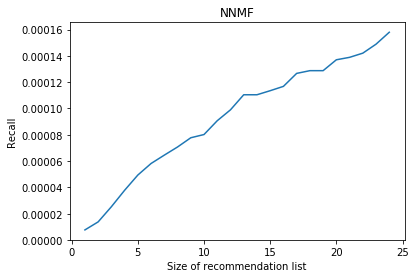

In [72]:
plot_func(tvals, recall_nnmf, "Size of recommendation list", "Recall", "NNMF")

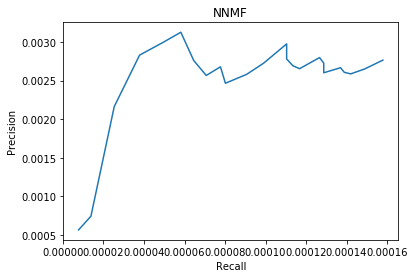

In [73]:
plot_func(recall_nnmf, precision_nnmf, "Recall", "Precision", "NNMF")

### Question 38

In [74]:
precision_mf, recall_mf = precision_recall(tvals, "mf")

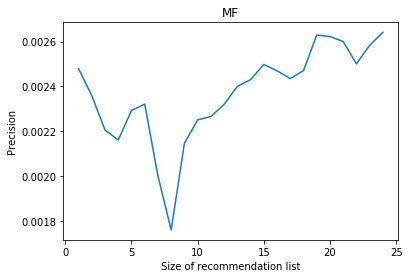

In [75]:
plot_func(tvals, precision_mf, "Size of recommendation list", "Precision", "MF")

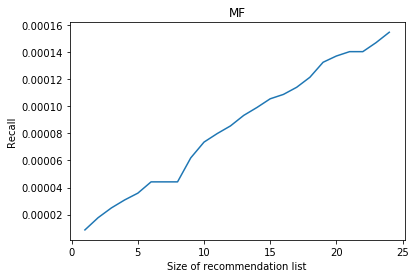

In [76]:
plot_func(tvals, recall_mf, "Size of recommendation list", "Recall", "MF")

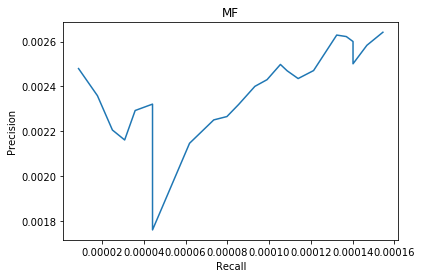

In [77]:
plot_func(recall_mf, precision_mf, "Recall", "Precision", "MF")

### Question 39 

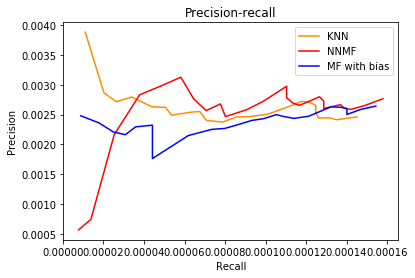

In [78]:
plt.figure()
plt.plot(recall_knn, precision_knn, color='darkorange', label='KNN')
plt.plot(recall_nnmf, precision_nnmf, color='red', label='NNMF')
plt.plot(recall_mf, precision_mf, color='blue', label='MF with bias')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-recall")
plt.legend()
plt.show()